In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv('./data/room-temperature.csv')

In [5]:
data.head()

,Date,FrontLeft,FrontRight,BackLeft,BackRight
0,4/11/2010 11:30,295.2,297.0,295.8,296.3
1,4/11/2010 12:00,296.2,296.4,296.2,296.3
2,4/11/2010 12:30,297.3,297.5,296.7,297.1
3,4/11/2010 13:00,295.9,296.7,297.4,297.0
4,4/11/2010 13:30,297.2,296.5,297.6,297.4


In [6]:
X = data[["FrontLeft","FrontRight",'BackLeft','BackRight']].values

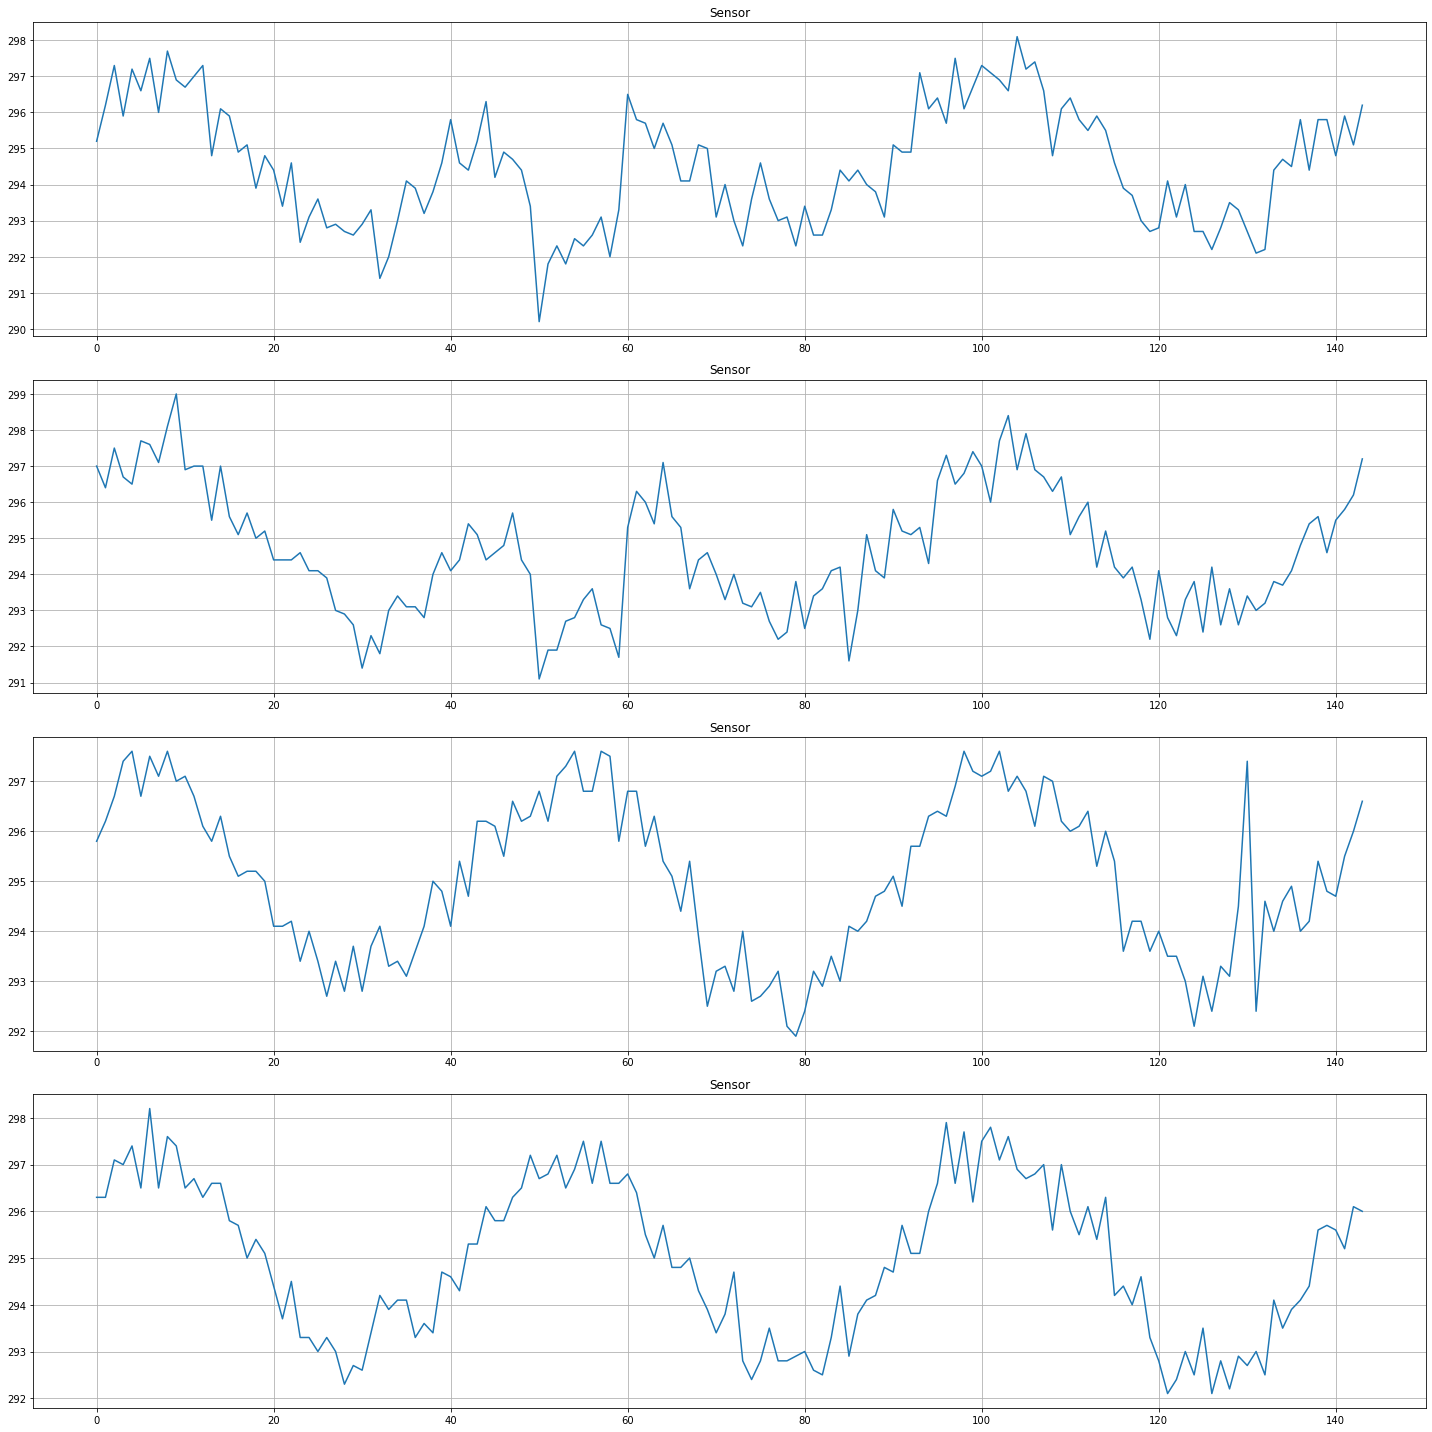

In [7]:
plt.figure(figsize=(20,20))
for i in range(1,5):
    plt.subplot(4,1,i)
    plt.plot(X[:,i-1])
    plt.title('Sensor')
    plt.grid()
    plt.tight_layout()

In [8]:
Xstd = (X-X.mean(axis=0))/X.std(axis=0,ddof=1)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(Xstd)
P=pca.components_
T = Xstd.dot(P.T)

# Squared Prediction Error

SPE using 1 component

In [9]:
Xhat = np.dot(T[:,0].reshape(-1,1),P[0,:].reshape(-1,1).T)
mse = (np.square(Xstd - Xhat)).sum(axis=1)

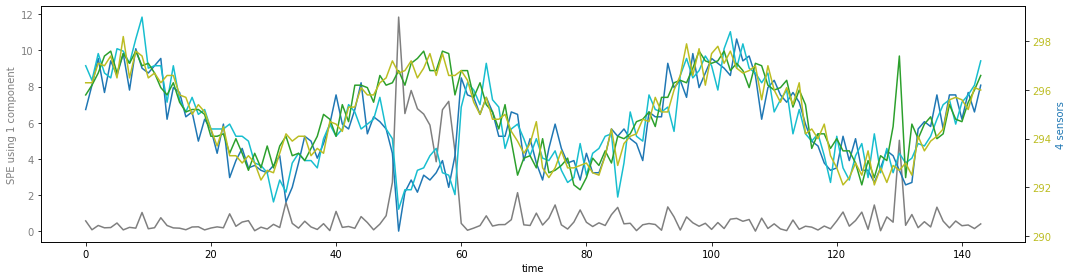

In [10]:
fig, ax1 = plt.subplots()
fig.set_size_inches(15,4)
color = 'tab:gray'
ax1.set_xlabel('time')
ax1.set_ylabel('SPE using 1 component', color=color)
ax1.plot(mse, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('4 sensors', color=color)  # we already handled the x-label with ax1
ax2.plot( X[:,0], color=color)
color = 'tab:cyan'
ax2.plot( X[:,1], color=color)
color = 'tab:green'
ax2.plot( X[:,2], color=color)
color = 'tab:olive'
ax2.plot( X[:,3], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

What happens with the second component